In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | bima
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | la baule-escoublac
Processing Record 11 of Set 1 | ferlach
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | itarema
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | yerbogachen
Processing Record 21 of Set 1 | curup
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | smithers


Processing Record 40 of Set 4 | williams lake
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | kourou
Processing Record 43 of Set 4 | tilichiki
Processing Record 44 of Set 4 | san jose
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | krasnoye
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | kutahya
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | lethem
Processing Record 2 of Set 5 | bojnurd
Processing Record 3 of Set 5 | alta floresta
Processing Record 4 of Set 5 | linxia
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | sept-iles
Processing Record 8 of Set 5 | auki
Processing Record 9 of Set 5 | eirunepe
Processing Record 10 of Set 5 | souillac
Processing Record 11 of Set 5 | porto novo
Processing Record 12 of Set 5 | conde
Processing Record 13 of Set 5 | las

Processing Record 29 of Set 8 | andenes
Processing Record 30 of Set 8 | san
Processing Record 31 of Set 8 | zaranj
Processing Record 32 of Set 8 | singaraja
Processing Record 33 of Set 8 | tarko-sale
Processing Record 34 of Set 8 | ust-maya
Processing Record 35 of Set 8 | dabakala
Processing Record 36 of Set 8 | bilibino
Processing Record 37 of Set 8 | katherine
Processing Record 38 of Set 8 | yaan
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | wahpeton
Processing Record 42 of Set 8 | ginir
Processing Record 43 of Set 8 | kholodnyy
Processing Record 44 of Set 8 | praya
Processing Record 45 of Set 8 | suntar
Processing Record 46 of Set 8 | odweyne
Processing Record 47 of Set 8 | minab
Processing Record 48 of Set 8 | korla
Processing Record 49 of Set 8 | haines junction
Processing Record 50 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 9 | weligama
Processing Record 2 of Set 9 | te anau
Processing Record 3

City not found. Skipping...
Processing Record 15 of Set 12 | muhos
Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | nacala
Processing Record 18 of Set 12 | chhukha
City not found. Skipping...
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | manaure
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | ridgecrest
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | raipur
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | diamantino
Processing Record 27 of Set 12 | palana
Processing Record 28 of Set 12 | gines
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | lasa
Processing Record 31 of Set 12 | orange cove
Processing Record 32 of Set 12 | haftoni
Processing Record 33 of Set 12 | ciudad bolivar
Processing Record 34 of Set 12 | sorvag
City not found. Skipping...
Processing Record 35 of Set 12 | redmond
Processing Record 36 of Set 12 | plotnikovo
Processing

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,75.27,60,79,11.50,AU,2021-05-23 01:56:46
1,Norman Wells,65.2820,-126.8329,59.04,47,90,8.05,CA,2021-05-23 01:56:47
2,New Norfolk,-42.7826,147.0587,59.92,63,12,1.01,AU,2021-05-23 01:56:47
3,Bima,-8.4667,118.7167,86.85,62,20,3.53,ID,2021-05-23 01:56:48
4,Ostrovnoy,68.0531,39.5131,32.40,96,100,24.61,RU,2021-05-23 01:43:11
5,Punta Arenas,-53.1500,-70.9167,33.91,90,0,5.48,CL,2021-05-23 01:54:56
6,Hermanus,-34.4187,19.2345,54.90,58,4,8.21,ZA,2021-05-23 01:56:48
7,Kaitangata,-46.2817,169.8464,57.92,60,13,5.46,NZ,2021-05-23 01:56:49
8,Castro,-24.7911,-50.0119,62.04,97,100,8.08,BR,2021-05-23 01:56:49
9,La Baule-Escoublac,47.2922,-2.3640,52.88,75,40,11.39,FR,2021-05-23 01:56:49


In [10]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-05-23 01:56:46,-24.8667,113.6333,75.27,60,79,11.50
1,Norman Wells,CA,2021-05-23 01:56:47,65.2820,-126.8329,59.04,47,90,8.05
2,New Norfolk,AU,2021-05-23 01:56:47,-42.7826,147.0587,59.92,63,12,1.01
3,Bima,ID,2021-05-23 01:56:48,-8.4667,118.7167,86.85,62,20,3.53
4,Ostrovnoy,RU,2021-05-23 01:43:11,68.0531,39.5131,32.40,96,100,24.61
5,Punta Arenas,CL,2021-05-23 01:54:56,-53.1500,-70.9167,33.91,90,0,5.48
6,Hermanus,ZA,2021-05-23 01:56:48,-34.4187,19.2345,54.90,58,4,8.21
7,Kaitangata,NZ,2021-05-23 01:56:49,-46.2817,169.8464,57.92,60,13,5.46
8,Castro,BR,2021-05-23 01:56:49,-24.7911,-50.0119,62.04,97,100,8.08
9,La Baule-Escoublac,FR,2021-05-23 01:56:49,47.2922,-2.3640,52.88,75,40,11.39


In [11]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

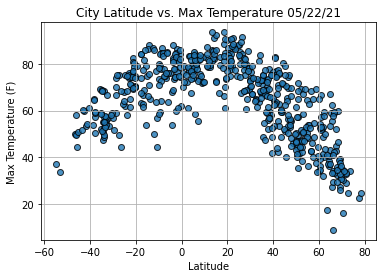

In [13]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

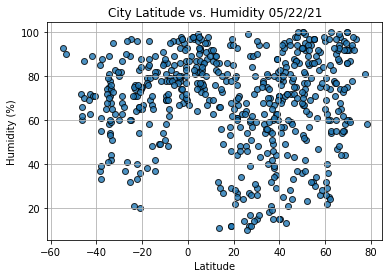

In [14]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

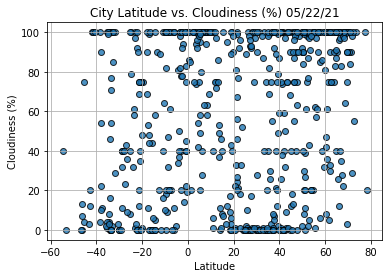

In [15]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

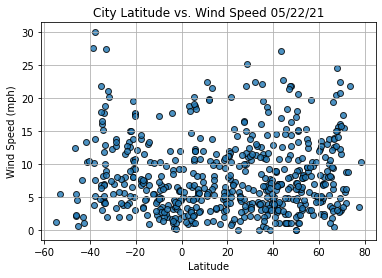

In [16]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

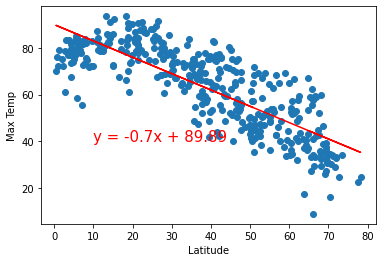

In [19]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

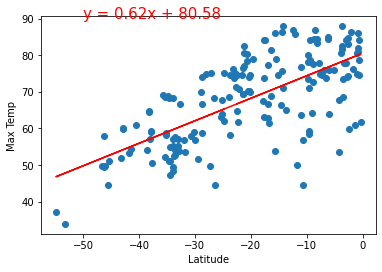

In [20]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [21]:
#The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

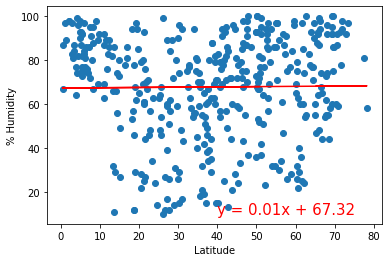

In [22]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

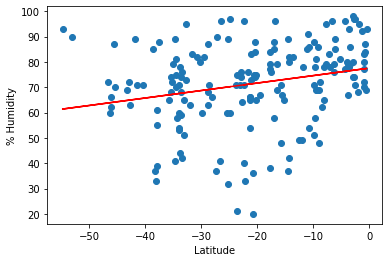

In [23]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [24]:
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

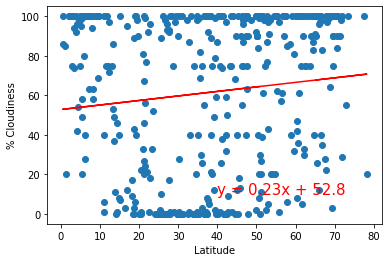

In [25]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))

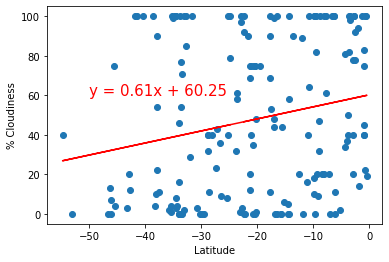

In [26]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [27]:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

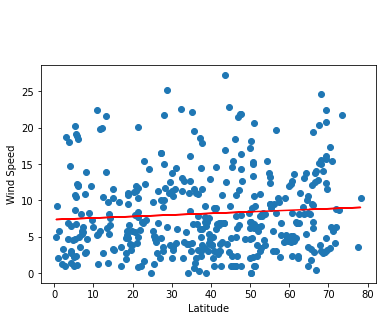

In [28]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

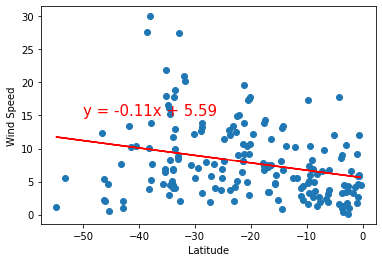

In [29]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

In [30]:
#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 